##Homework 6: Clustering

**Due date**: Wednesday, March 27th by 11:59pm


###**Question 1**: K-means with Manhattan distance (20 pts)


In this exercise, we will explore how to generalize the **k-means** algorithm  in order to use distance measures other than the squared Euclidean distance studied in class.

k-means assigns data $\mathbf{x}_i \in \mathbb{R}^d$ into $k$ clusters by minimizing a cost function:
$$Cost(\mathbf{c}_1, \cdots, \mathbf{c}_k, y_1, \cdots, y_N) = \sum_{j=1}^{k} \sum_{i \in C_j} dist(\mathbf{x}_i, \mathbf{c}_{j}) \quad \quad \quad  (1)$$

where $y_i \in \{1, \cdots, k\}$ is the 'cluster label' to data $\mathbf{x}_i$, $C_j = \{i \in \{1, \cdots, N\}: y_i = j \}$ is an index set that keeps a record of which data have been assigned to cluster $j$, $dist(\cdot, \cdot)$ is a distant function, $\mathbf{c}_{j} \in \mathbb{R}^d$ is a **cluster representative** for cluster $j$. The minimization problem to equation (1) is NP-hard, so we need alternative heuristic to solve $\mathbf{c}_1, \cdots, \mathbf{c}_k, y_1, \cdots, y_N$ iteratively by repeating equation (2) and (3) until convergence.

We first find the cluster reprsentitives by:
$$\mathbf{c}_j = \underset{c}{\operatorname{argmin}} \sum_{{i} \in C_j} dist( \mathbf{x}_i, \mathbf{c}) \quad \forall j = \{1, \cdots, k\} \quad \quad \quad  (2)$$

Then we assign data $\mathbf{x}_i$ with cluster label $y_i$ by:
$$y_i = \underset{j}{\operatorname{argmin}} dist(\mathbf{x}_i, \mathbf{c}_j) \quad \forall i \in \{ 1, \cdots, N\} \quad \quad \quad  (3)$$

K-means by default considers euclidean distance that is $ dist(\mathbf{x}, \mathbf{c}) = \| \mathbf{x} - \mathbf{c} \|_2^2  $. In class, we derived the cluster representitive is cluster mean. Now, consider an alternative distance function Manhattan distance, that is

$$ dist(\mathbf{x}, \mathbf{c}) = \| \mathbf{x} - \mathbf{c} \|_1  $$

####1.a. (10 pts) Derive the cluster representitive when using Manhatan distance. (This is exactly identical to what we did in class when considering euclidean distance).  


**Answer here:**


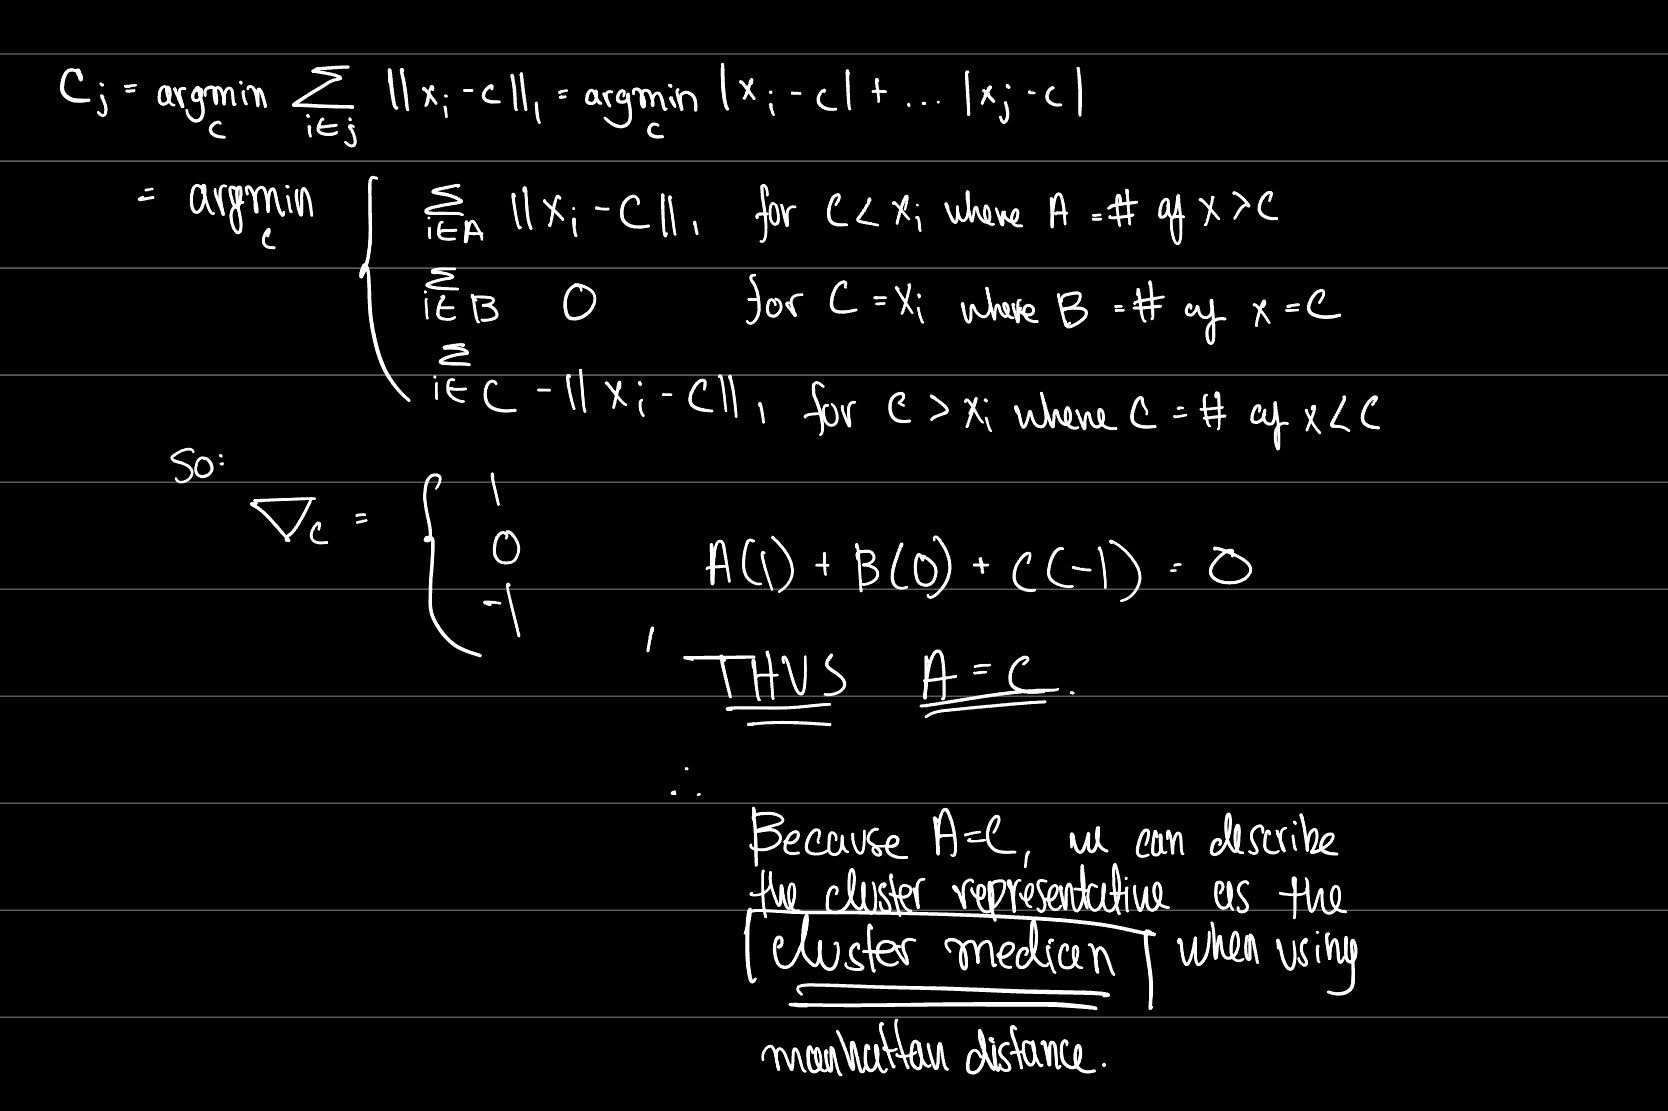



####1.b. (5pts) Write down the pseudocode for the modified k-means algorithm with Manhattan distance. (This should be analogous to the original k-means algorithm done in class.)



**Answer here:**


      Initialize K arbitrary centroids from the dataset.


            Loop until convergence:

            a.Determine new labels of samples as a result of distance to nearest centroids (using manhattan distance).

            b.Update each centroid by taking the mean of the data points assigned to it.

   
      Return the final centroids and the cluster assignments.



####1.c. (5pts) State one potential advantage of using Manhattan distance over squared Euclidean distances for the purpose of clustering.



**Answer here:**

    Since euclidean distance is more influenced by outliers, manhattan distance is preferable in datasets with considerable outliers in, for example, high dimensional datasets.


####1.d. (Bonus: 5 pts) Show that the modified k-means algorithm with Manhattan distance monotonically minimizes the objective function until local convergence (Hint: the convergence theorem for k-means algorithm discussed in class).

**Answer here:**

    i have no idea




###**Question 2:**  K-means Implementation (35 points)

Here you will apply K-means on simple Gaussian data. You are given some comments to assist you in implementing this clustering method. Please fill in the answer whenever you see the comment `### WRITE CODE HERE:`. For some questions, there are some dummy test after `### TEST YOUR FUNCTION HERE:` provided for you to test your function. There are also some expected output provided.

**Notes:** You are also welcomed discard the comments and to complete each functions using your own logic flow as long as each of the tasks are accomplished.

In [961]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import random

random.seed(10)

#### Create a toy dataset and plot it

Generate data from three $2$D Gaussian distributions, each with the following means and covariances:

$$\boldsymbol{\mu}_1 = [2,2]^T, \boldsymbol{\mu}_2 = [-2,-2]^T, \boldsymbol{\mu}_3 = [0,-2]^T$$

$$\Sigma_1 = [[0.02,0];[0,0.02]], \Sigma_2 = [[0.2,0];[0,0.2]], \Sigma_3 = [[0.05,0];[0,0.05]]$$

Sample 50 data points from each of the Gaussian to create a toy dataset for clustering. Complete the `scatter_by_category` function and use it create a colored scatter plot of the generated data, and the color represents the data are generated from different Gaussian.

**Notes:** the imported seaborn library is an alternative library for plotting graph other than matplotlib. You may find the following link is useful to plot a colored scatter plot: https://seaborn.pydata.org/generated/seaborn.scatterplot.html. You are free to choose any library to produce the graph.

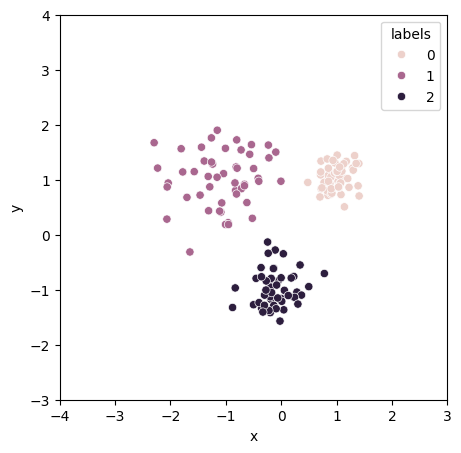

In [962]:
# Do NOT change the seed in any problem, unless you are explicitly allowed to do
rng = np.random.default_rng(0)

# Generate 2D Gaussian Data with 3 clusters of 3 different means and Covariance
n_per_cluster = 50
xy1 = rng.multivariate_normal([1,1], [[0.05,0],[0,0.05]], n_per_cluster)
xy2 = rng.multivariate_normal([-1,1], [[0.3,0],[0,0.3]], n_per_cluster)
xy3 = rng.multivariate_normal([0,-1], [[0.08,0],[0,0.08]], n_per_cluster)

DATA = np.concatenate((xy1, xy2, xy3), axis=0)
DATA_labels = np.zeros(3*n_per_cluster, np.uint8)
DATA_labels[n_per_cluster:2*n_per_cluster] = 1
DATA_labels[2*n_per_cluster:] = 2


def scatter_by_category(X, labels, m=None):
    '''
    A function that produce scatter plot of data and color coded with labels.
    If  the `m` argument  is  supplied, this the `m`  argument provides  the cluster
    means and these should be superimposed upon the data scatterplot in red
    (see example output for what this plot should look like with m=None,
    and example out from question 3f for what it should look like with m!=None).

    n: number of data
    d: number of features
    k: number of clusters

    arguments:
      X: data matrix (n, d)
      labels: label for the entire dataset (n, )
      m: cluster means matrix (k, d) where the i^{th} row of m is the mean for data from the i^{th} cluster

    no return value.
    '''

    plt.figure(figsize=(5,5))
    plt.xlim([-4, 3])
    plt.ylim([-3, 4])
    df = pd.DataFrame({'x':X[:, 0], 'y':X[:, 1], 'labels':labels})
    sns.scatterplot(x='x', y='y', data=df, hue='labels')
    if m is not None: plt.scatter(m[:, 0], m[:, 1], color='r', linewidths=2)
    plt.show()

scatter_by_category(DATA, DATA_labels)

#### 2.a. (5 pts) For k-means algorithm, we need to initialize k number of centroids. One initialization strategy is to randomly sample k number of data within the dataset as initial centroids. Complete `initKRandomCentroids` function which returns the initial centroids.

In [963]:
import numpy as np

def initKRandomCentroids(k, trainingSet):

    '''
    A function that returns samples k number of data from trainingSet as initial centroids

    arguments:
      k: integer number of clusters
      trainingSet: np.array of shape  (n, d)

    returns:
      initial_centroids: np.array of shape (k, d)
    '''

    ### please do not delete the following three lines, as we are going to uncomment those lines at the end to see something interesting !
    # indices = [1, 51, 101]
    # indices = [-1,-2,75]
    # indices = [93, 17, 51]
    # indices = [94, 15, 50]
    
    ### WRITE CODE HERE:
    initial_indices = np.random.choice(trainingSet.shape[0], k, replace=False)
    initial_centroids = trainingSet[initial_indices]

    
    ### END OF STUDENT CODE

    return initial_centroids


#### 2.b. (5 pts) Usage of Dictionaries
In this question, we will be using a data structure `Dictionaries`: https://docs.python.org/3/tutorial/datastructures.html#dictionaries which stores key-value pairs. The value can be any data structure with any shape, such versatility allows Dictionaries becoming a suitable data structure for keeping records of data from different clusters.

During k-means algorithms, we are constantly updating clustering assignment for each data as well as the cluster centroids at each iteration. We store cluster indices as key, and store all data that were assigned to that particular cluster as values.

For this question, suppose we are given variable `dictionary` which stores cluster indices as keys and the corresponding data as values, complete `newCentroid` function to calculate the new centroids using the clusters information stored in `dictionary`.

In [964]:
import numpy as np

def newCentroid(dictionary):
    '''
    Compute new centroids given clusters information stored in a dictionary.

    Args:
    dictionary (dict): Key-value pairs where keys are cluster indices and values are data for each cluster.

    Returns:
    centroids (numpy.ndarray): New centroids as a shape (k, d) numpy array.
    '''
    centroids = np.array([np.mean(v, axis=0) for v in dictionary.values()])
    return centroids


In [965]:
### TEST YOUR FUNCTION HERE:
dummy_dict = {0: np.arange(0, 9).reshape(-1, 3),
              1: np.arange(0, 12).reshape(-1, 3),
              2: np.arange(0,6).reshape(-1,3),
              3: np.arange(0,6).reshape(-1,3)}
newCentroid(dummy_dict)

array([[3. , 4. , 5. ],
       [4.5, 5.5, 6.5],
       [1.5, 2.5, 3.5],
       [1.5, 2.5, 3.5]])

#### 2.c. (2 pts) Complete `get_objective` function which compute the objective function value after each iteration.

In [966]:
import numpy as np

def get_objective(dictionary, centroids):
    '''
    A function that computes the objective function value

    arguments:
    dictionary: key-value pairs, where keys are cluster indices and values are data for each cluster
    centroids: k number of centroids as a shape (k, d) numpy array

    returns:
    obj_val: real-valued objective function value
    '''

    obj_val = 0

    for key, value in dictionary.items():
        distances = np.linalg.norm(value - centroids[key], axis=1)
        obj_val += np.sum(distances ** 2)

    return obj_val


####2.d. (10 pts) Implement `kmeans` with functions from part (a)-(e).

In [967]:
import numpy as np
import matplotlib.pyplot as plt  # Assuming you will use this for plotting

def kmeans(k, trainSet, max_iter, plot=False, init_func=initKRandomCentroids):
    '''
    A function perform cluster assignment over `max_iter` iterations, and returns centroids, clusters and obj_val at the last iteration

    If the `plot` argument is True, then this function should use scatter_by_category to
    plot the returned clustering.

    arguments:
      k: cluster number
      trainSet: (n, d)
      max_iter: maximum iteration
      plot: visualizing current clustering when is True
      init_func: a function to use to initialize the cluster centers.
        It should have the same input and output signature as initKRandomCentroids.
        (we will later on need to change this init_func when you implement kmeans++)

    returns:
      centroids: centroids at each iteration (k, d)
      clusters: a dictionary that stores data for each cluster
      obj_val: objective function values over each iteration
    '''

    clusters = {}

    obj_val = []

    centroids = init_func(k, trainSet)

    for _ in range(max_iter):
        clusters = {key: [] for key in range(k)}
        for i in trainSet:
            d = np.linalg.norm(centroids - i, axis=1)
            nearest = np.argmin(d)
            clusters[nearest].append(i)

        centroids = newCentroid(clusters)

        obj_val.append(get_objective(clusters, centroids))

        if plot:
            plt.scatter(trainSet[:, 0], trainSet[:, 1], c=[key for key in clusters for _ in clusters[key]])
            plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red')
            plt.show()

    return centroids, clusters, obj_val


#### Run k_means and plot `DATA` colored with its cluster assignment, and superposed with cluster mean at each iteration. Using `k = 3`, `max_iter =5`.

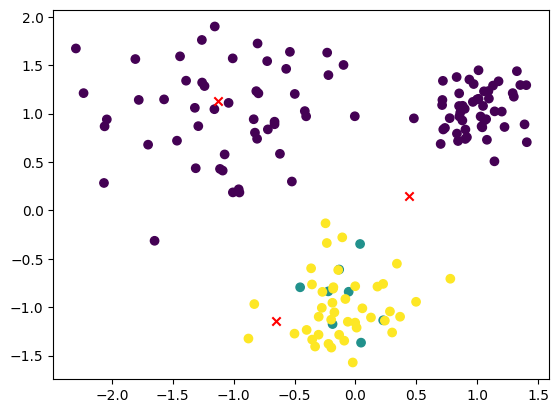

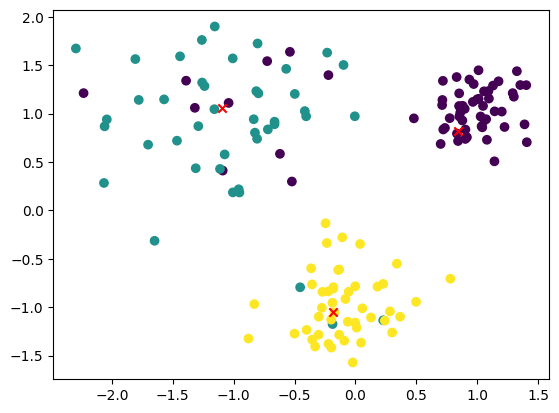

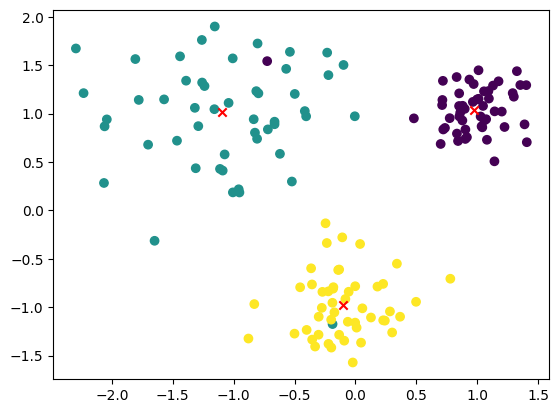

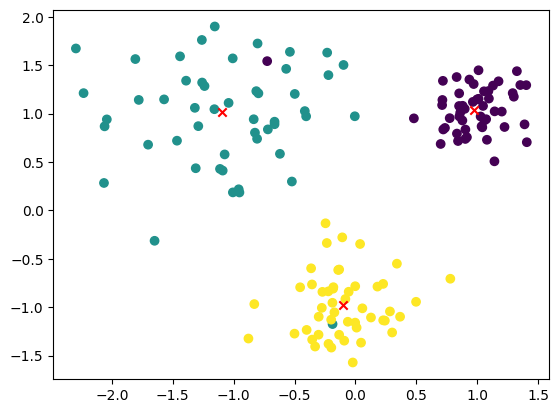

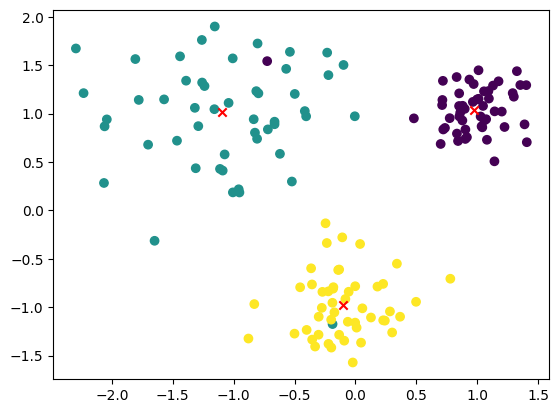

In [968]:
centroids, clusters, obj_val = kmeans(3, DATA, max_iter = 5, plot = True, init_func=initKRandomCentroids)

#### Plot the objective function value of k-means algorithm over each iteration. If everything was implemented appropriately, you should see a strictly **non-increasing** objective function values as proofed in class.


Text(0, 0.5, '$J^{(t)}$')

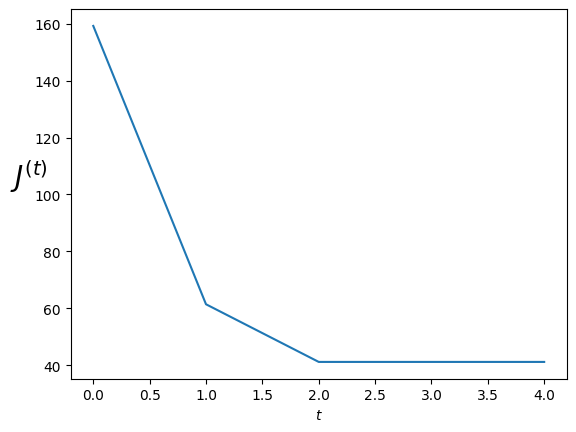

In [969]:
### WRITE CODE HERE:
plt.plot(list(range(len(obj_val))), obj_val)
plt.xlabel(r'$t$')
plt.ylabel(r'$J^{(t)}$', rotation=0, fontsize=20)


####2.e. (3pts) Go back to your part (b) comment out the random centroids initialization, observe the effect of initializing at different places (1):`indices = [1, 51, 101]`, (2):`indices = [-1,-2,75]`, and (3): `indices = [93, 17, 51]`, respectively by plotting the same graph as your part (f) in turns. You can use `k=3`, `max_iter = 10`. And comment on each of their convergence within 10 iterations.

**Note:** You do not need to show plots for this question just provide a **very short** answer of whether each of the initialization converged with sensible final clusters or not. Also please make sure for your submitted answer, part (f)(g) should be plotted with the random initialization.


**Answer here:**

        k=3, max_iter =10



        (1) [1,51,101] - Convergence seems sensible


        (2) [-1,-2,75] - Convergence seems sensible


        (3) [93, 17, 51] - Convergence seems sensible


####2.f. (8pts) Now we think about how to determine the optimal K for K-Means. We introduce a simple algorithm, namely `Elbow Method`. The elbow method is a graphical method for finding the optimal K value in a k-means clustering algorithm. The elbow graph shows the objective function value of the last iteration on the y-axis corresponding to the different values of K (on the x-axis). See https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/ for details. Implement `elbow_method` with functions from part (a)-(h).



1
2
3
4
5
6
7
8
9
10
[282.4936695745418, 147.00047406704167, 41.22607561206021, 37.94269821744571, 24.954468242006495, 28.76646092556858, 19.37491733430274, 17.238929000995558, 30.483275240843255, 13.631506595307522]


Text(0, 0.5, '$J^{(t)}$')

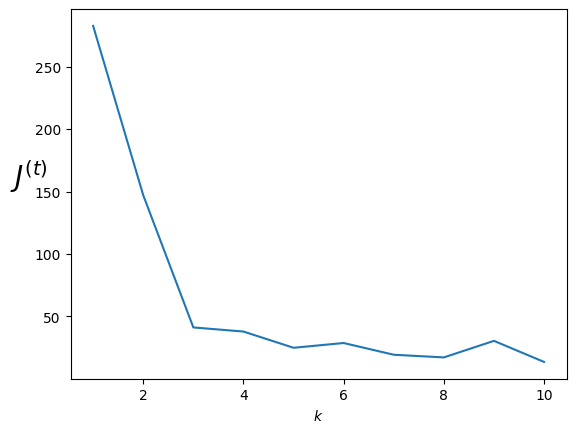

In [970]:
def elbow_method(max_k, trainSet, max_iter, plot, init_func):
  '''
    arguments:
      max_k: max cluster number
      trainSet: (n, d)
      max_iter: maximum iteration
      plot: visualizing current clustering when is True
      init_func: a function to to  use to initialize the cluster centers.
        It should have the same input and output signature as initKRandomCentroids.
        (we will later on need to change this init_func when you implement kmeans++)

    returns:
      obj_val: objective function values of the last iteration corresponding to K values within [1: max_k]
  '''
  obj_vals = []
  ### WRITE CODE HERE:
  for i in range(1, max_k+1):
    centroids, clusters, obj_val = kmeans(i, trainSet, max_iter, plot, init_func)
    obj_vals.append(obj_val[-1])
    print(i)
  ### END OF STUDENT CODE
    obj_vals_flat = np.array(obj_vals).flatten()
  return obj_vals


max_k = 10
obj_vals = elbow_method(max_k, DATA, max_iter=5, plot=False, init_func=initKRandomCentroids)
print((obj_vals))

plt.plot(list(range(1,max_k+1)), obj_vals)
plt.xlabel(r'$k$')
plt.ylabel(r'$J^{(t)}$', rotation=0, fontsize=20)

####2.g. (2pts) Given the figure above, which K value will you choose?


**Answer here:**

        The "elbow" appears at k=3, so I'd say 3.
        **Note sometimes its around 4, but usually its 3.



### **Question 3:** Implementing k-means++ (10pts)

In order to avoid errors due to a bad initialization, k-means++ introduces a smarter method of initialization to avoid local minima. It does so by first assigning one centroid to be a random datapoint, and assigning each subsequent centroid as the point with the maximum distance from the previous centroids.

####3.a (6pts) New Initialization Function

Complete the following function with the new k-means++ initialization method. The first centroid should be initialized to be a random point in the trainSet. For the rest,

In [971]:
import numpy as np

def initialize_kmeanspp(k, trainSet):
    '''
    A function that initializes k centroids using the kmeans++ randomized algorithm.
    arguments:
        k - number of clusters
        trainSet - numpy array of data points shape (n, d)

    returns:
        shape (k, d) numpy array of centroids
    '''

    n, d = trainSet.shape
    centroids = np.zeros((k, d))

    centroids[0] = trainSet[np.random.randint(n)]

    for i in range(1, k):
        d = np.zeros(n)
        for j in range(n):
            d[j] = np.min(np.sum((centroids[:i] - trainSet[j])**2, axis=1))

        prob = d / np.sum(d)
        z = np.argmax(prob)
        centroids[i] = trainSet[z]

    return centroids


####3.b Test the k-means++ algorithm

Now, change the initialization function of kmeans to call your new initialization function to run the k-means++ algorithm.

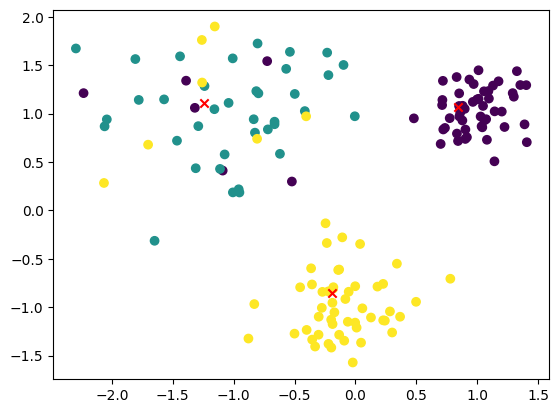

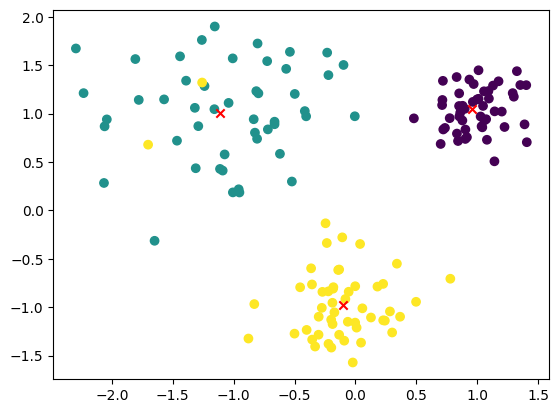

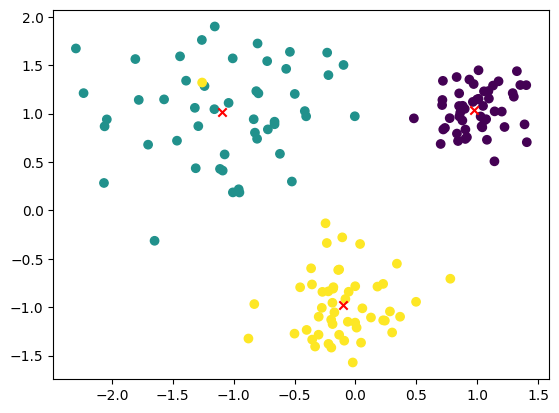

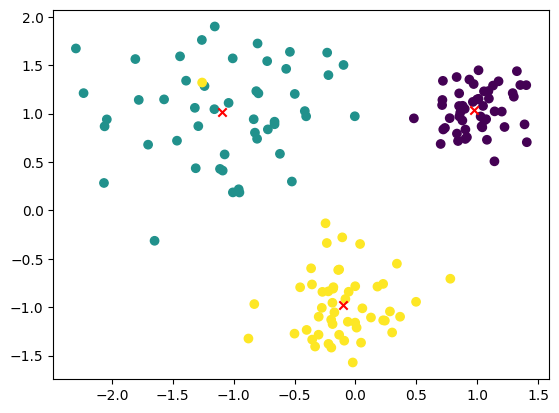

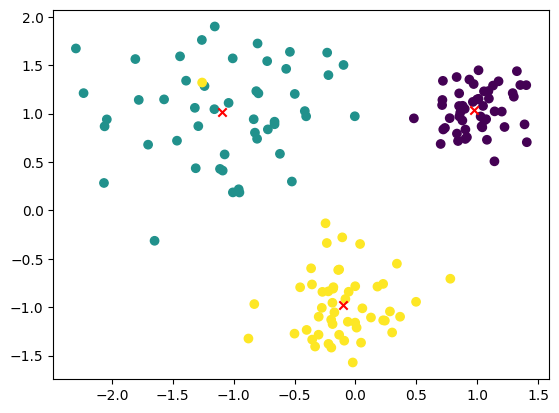

In [972]:
centroids, clusters, obj_val = kmeans(3, DATA, max_iter =5, plot = True, init_func=initialize_kmeanspp)

####3.c (4pts) Does the k-means++ algorithm work better? Run the algorithm a few times. Does it have a better initialization? Is it guaranteed to have a better initialization?

**Answer here:**

    Seems like initialization is better! We almost always start close to the middle of each cluster.


    It is guaranteed to have a better initialization in the sense that it is guaranteed to find a solution that is O(log k) competitive to the optimal k-means solution. 

    There may however, as a result of the complete randomness of k-means, be an at least equivelantly good initialization since k-means and k++ means may find the same centroid initializations. So guarantee is probably not the right word.